# Part II - (Presentation Title)
## by Thao Ho

## Investigation Overview

The goal of this investigation is to perform an exploratory data analysis (EDA) on a loan dataset to identify key trends and relationships among loan attributes. By visualizing and analyzing the data, we aim to gain insights into loan performance, borrower characteristics, and market dynamics to inform decision-making, risk assessment, and product development.


## Dataset Overview and Executive Summary
The dataset includes loan details, borrower demographics, employment data, and performance metrics. This EDA aims to explore loan characteristics, borrower behavior, and market trends.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

# Columns related to Loan Performance
loan_efficiency_columns = [ 
'LoanStatus', 'BorrowerAPR', 'ProsperScore', 'LoanCurrentDaysDelinquent',
'LoanMonthsSinceOrigination', 'CreditScoreRangeLower', 'DebtToIncomeRatio',
'LoanOriginalAmount', 'CreditScoreRangeUpper',
'EmploymentStatus', 'IsBorrowerHomeowner'
]

# Create a DataFrame with only the necessary columns
loan_efficiency_df = df[loan_efficiency_columns]

## (Visualization 1) What is the distribution of loan statuses?

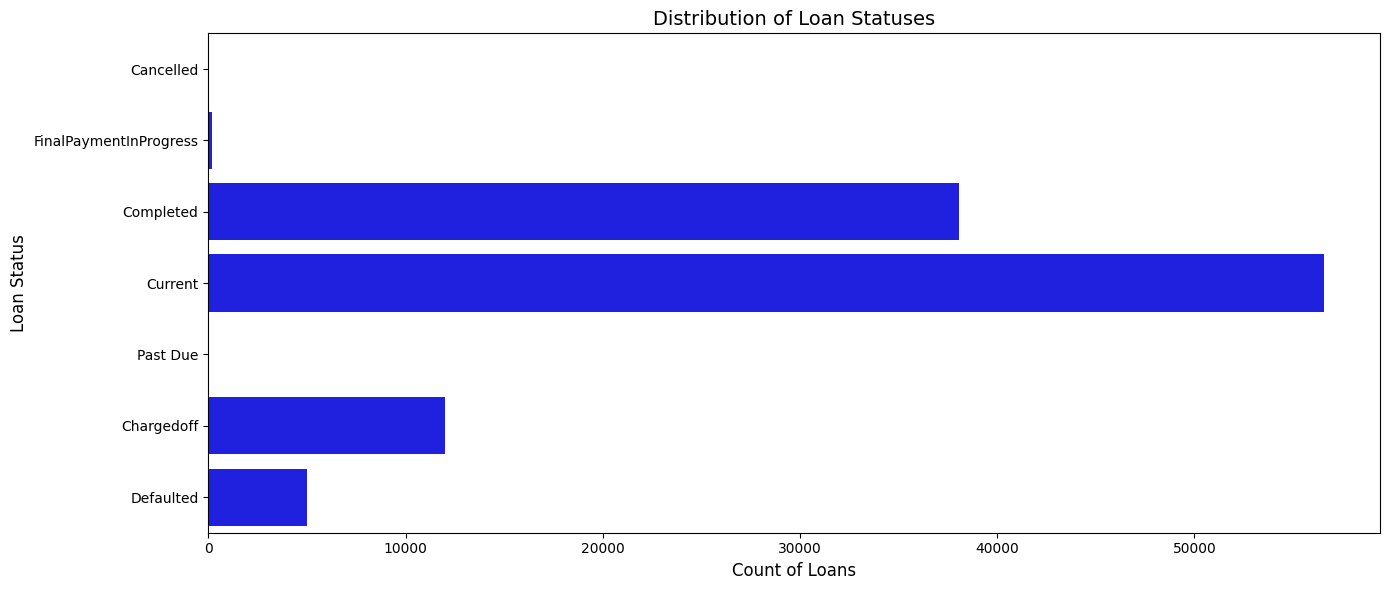

In [6]:
# Define the order of loan statuses for visualization
loan_status = [
    'Cancelled', 
    'FinalPaymentInProgress', 
    'Completed', 
    'Current', 
    'Past Due', 
    'Chargedoff',
    'Defaulted',
]

# Set up the plot
fig, ax = plt.subplots(figsize=(14, 6))  # Create figure and axes with specified size

# Plot the data with Seaborn
sns.countplot(
    data=loan_efficiency_df,  # Source data
    y='LoanStatus',           # Variable to plot
    color='blue',           # Bar color
    order=loan_status,  # Order of categories
    ax=ax                     # Specify axes for the plot
)

# Customize labels and title
ax.set_xlabel('Count of Loans', fontsize=12)  # Label for X-axis
ax.set_ylabel('Loan Status', fontsize=12)     # Label for Y-axis
ax.set_title('Distribution of Loan Statuses', fontsize=14)  # Title of the plot

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Loan Status Distribution:

The bar chart shows the distribution of loan statuses:

- **Current**: The largest category, indicating most loans are active and being repaid on time.
- **Completed**: The second-largest category, representing loans that have been fully repaid.
- **Chargedoff**: A moderate number of loans written off as uncollectible.
- **Defaulted**: A smaller number of loans where borrowers have failed to pay for an extended period.
- **Past Due**: Loans with delayed payments but not yet defaulted.
- **Cancelled/Final Payment In Progress**: Very few loans in these categories.

**Summary**: Most loans are "Current" or "Completed," showing healthy repayment trends. However, "Chargedoff" and "Defaulted" loans highlight risks, suggesting a need to reduce delinquencies and defaults.

## (Visualization 2) In what ways does the original loan amount vary over time? 

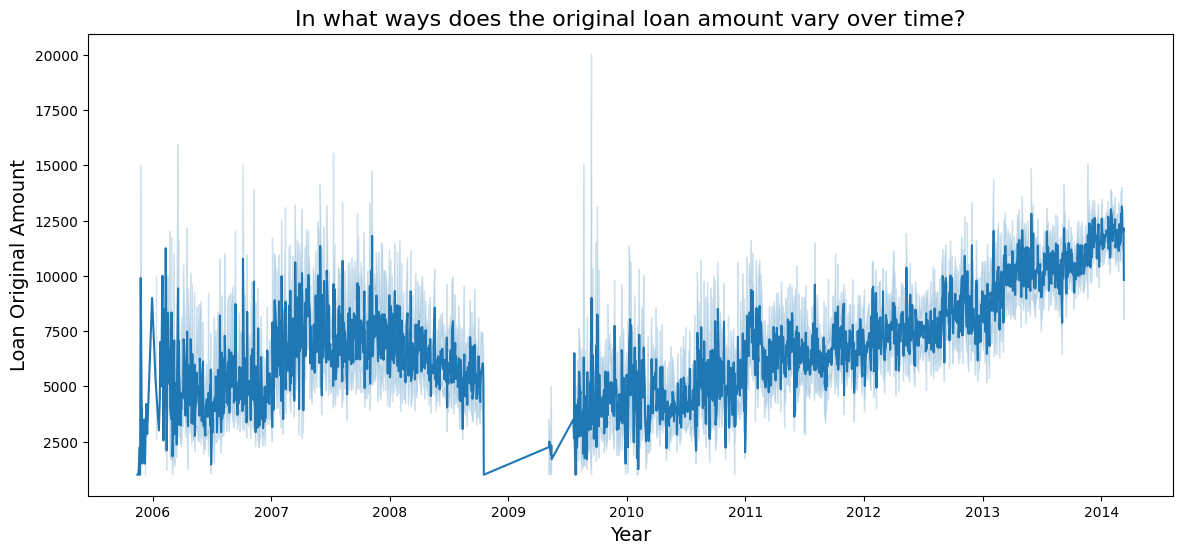

In [7]:
# Create a figure and axis object with a suitable figure size
fig, ax = plt.subplots(figsize=(14, 6))

# Ensure that the LoanOriginationDate is in datetime format
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

# Plot a line chart with specified data, x and y variables, and color
sns.lineplot(
    data=df,                        # Data source
    x='LoanOriginationDate',         # Variable on the x-axis (date)
    y='LoanOriginalAmount'          # Variable on the y-axis (amount)
)

# Set labels for the axes
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Loan Original Amount', fontsize=14)

# Add a title to the plot
ax.set_title('In what ways does the original loan amount vary over time?', fontsize=16)

# Show the plot
plt.show()


### Analysis: Variation of Original Loan Amount Over Time

The line graph titled "In what ways does the original loan amount vary over time?" reveals the following insights from 2006 to 2014:

1. **2006-2008**: Loan amounts fluctuate significantly, peaking at around $15,000.
2. **2009**: A noticeable drop occurs, with a sharp decline mid-year.
3. **2010**: Loan amounts begin to recover, showing a spike followed by moderate fluctuations.
4. **2011-2014**: A gradual increase in loan amounts is observed, stabilizing at around $15,000 by 2014.

### Summary:
The graph shows early fluctuations (2006-2008), a sharp decline in 2009, and steady growth from 2011 to 2014. These trends likely reflect economic factors and policies, offering insights into the changing lending environment.

## (Visualization 3) How does the debt-to-income ratio affect the borrower’s loan performance (e.g., delinquency or on-time payments)?

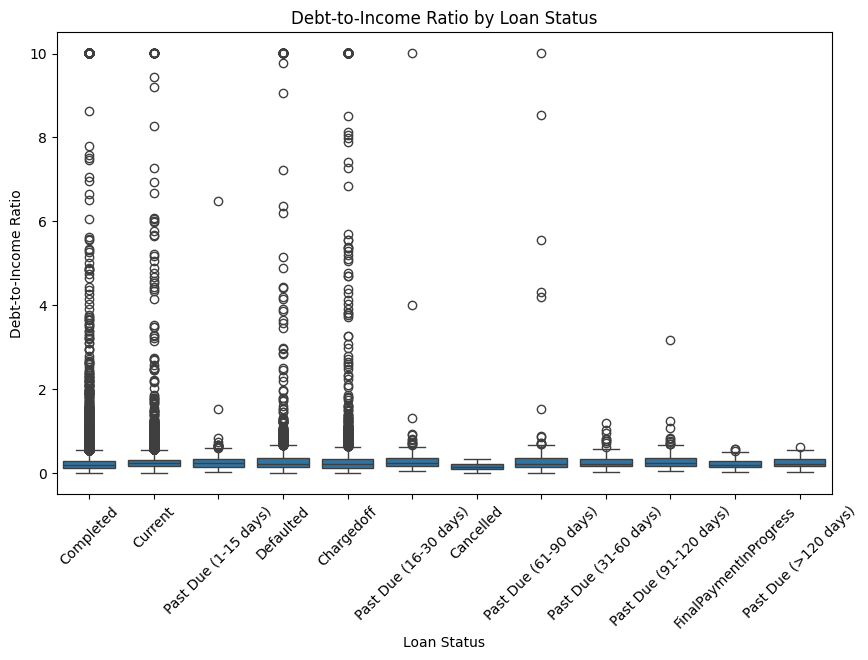

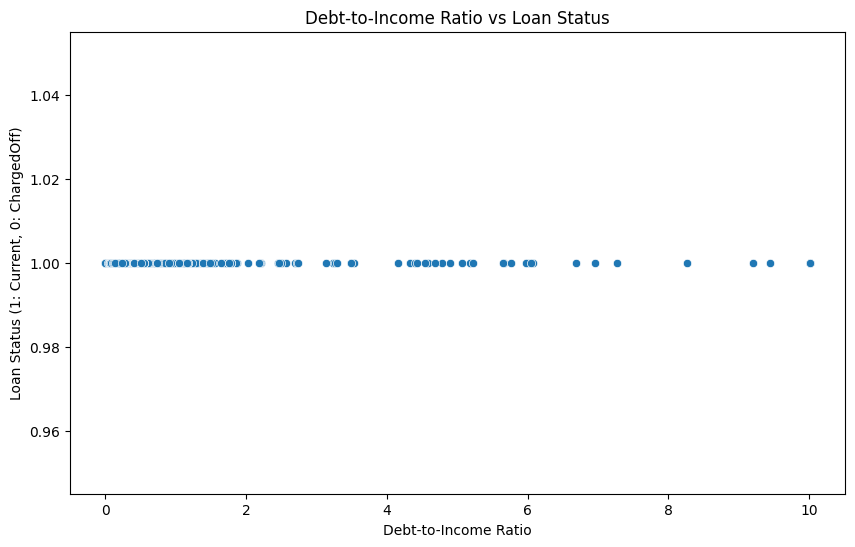

In [8]:
# Check data contains DebtToIncomeRatio and LoanStatus
df_filtered = df[['DebtToIncomeRatio', 'LoanStatus']]

# Draw a boxplot to check the distribution of DebtToIncomeRatio according to LoanStatus
plt.figure(figsize=(10,6))
sns.boxplot(x='LoanStatus', y='DebtToIncomeRatio', data=df_filtered)
plt.title('Debt-to-Income Ratio by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio')
plt.xticks(rotation=45)
plt.show()

# Draw a scatter plot to test the relationship between DebtToIncomeRatio and LoanStatus
# Assuming LoanStatus has been encoded into numeric values ​​(0 for bad debt, 1 for on-time payment)
# If LoanStatus are text statuses, you can use label encoding
df_filtered['LoanStatus_encoded'] = df_filtered['LoanStatus'].map({'Current': 1, 'ChargedOff': 0})

# Draw a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='DebtToIncomeRatio', y='LoanStatus_encoded', data=df_filtered)
plt.title('Debt-to-Income Ratio vs Loan Status')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Loan Status (1: Current, 0: ChargedOff)')
plt.show()

### Insight Analysis: Impact of Debt-to-Income Ratio on Loan Performance

From the analysis is as follows:

**Debt-to-Income Ratio by Loan Status**:
- **High Debt-to-Income Ratio**: Borrowers with higher debt-to-income ratios are more likely to have loans in "Defaulted" or "Chargeoff" statuses, suggesting that higher debt burdens lead to higher delinquency and default rates.
- **Lower Debt-to-Income Ratio**: Loans in "Completed" and "Current" statuses typically have lower debt-to-income ratios, indicating borrowers with better debt management and timely payments.

**Debt-to-Income Ratio vs Loan Status**:
- **Clustering of Current Loans**: Most loans remain current regardless of the debt-to-income ratio, indicating borrowers generally stay on track with payments.
- **Variation in Ratios**: While there is a variation in debt-to-income ratios, this doesn't strongly correlate with the current status of loans, implying other factors may also affect loan performance.

### Conclusion:
A high debt-to-income ratio tends to correlate with higher delinquency and default rates, while lower ratios are linked to on-time payments and loan completion. However, most loans remain current across various ratios, suggesting that other factors play a role in loan performance. This insight helps lenders assess borrower risk and make informed decisions.